# Dimensionality Reduction

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline
import matplotlib

from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

* Many	Machine	Learning	problems	involve	thousands	or	even	millions	of	features	for	each training	instance.	
* Not	only	does	this	make	training	extremely	slow,	it	can	also	make	it much	harder	to	find	a	good	solution.
* This	problem	is	often	referred	to	as **the	curse	of	dimensionality**.
* Reducing	dimensionality	does	lose	some	information, so	even	though	it	will	speed	up	training.
* Apart	from	speeding	up	training,	dimensionality	reduction	is	also	extremely	useful	for data	visualization	(or	DataViz).	
* Reducing	the	number	of	dimensions	down	to	two	(or three)	makes	it	possible	to	plot	a	high-dimensional	training	set	on	a	graph	and	often	gain some	important	insights	by	visually	detecting	patterns,	such	as	clusters.

# The	Curse	of	Dimensionality

* High-dimensional	datasets	are	at	risk	of being	very	sparse:	most	training	instances	are	likely	to	be	far	away	from	each	other.	
* This	also	means	that	a	new	instance	will	likely	be	far	away	from	any	training instance,	making	predictions	much	less	reliable	than	in	lower	dimensions,	since	they	will be	based	on	much	larger	extrapolations.	
* In	short,	the	more	dimensions	the	training	set	has,the	greater	the	risk	of	overfitting	it.
* In	theory,	one	solution	to	the	curse	of	dimensionality	could	be	to	increase	the	size	of	the training	set	to	reach	a	sufficient	density	of	training	instances.	
* Unfortunately,	in	practice,the	number	of	training	instances	required	to	reach	a	given	density	grows	exponentially with	the	number	of	dimensions.

# Main	Approaches	for	Dimensionality	Reduction

* There are two main approaches for Dimensionality Reduction. They are
   1. Projection
   2. Manifoldlearning

# Projection

* In	most	real-world	problems,	training	instances	are	not	spread	out	uniformly	across	all
dimensions.	
* Many	features	are	almost	constant,	while	others	are	highly	correlated	(as
discussed	earlier	for	MNIST).	
* As	a	result,	all	training	instances	actually	lie	within	(or close	to)	a	much	lower-dimensional	subspace	of	the	high-dimensional	space.
* Now	if	we	project	every	training	instance perpendicularly	onto	this	subspace,	we	get	the	new	lower dimensional	dataset 

In [60]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [61]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

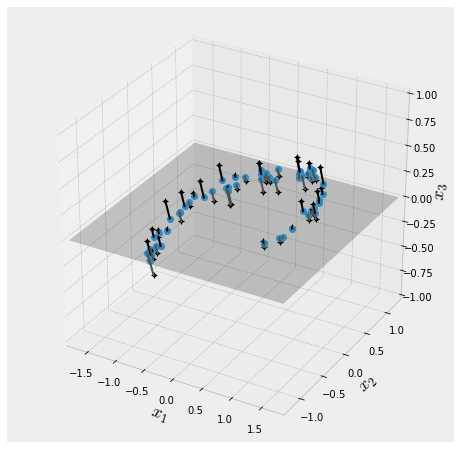

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "k+")
ax.plot(X[:, 0], X[:, 1], X[:, 2], "k.")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "o")
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
        
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

* The plane represents	a	lower-dimensional	(2D) subspace	of	the	high-dimensional	(3D)	space.	
* Every	training	instance is projected perpendicularly	onto	this	subspace	(as	represented	by	the	short	lines	connecting	the instances	to	the	plane)	forming a	new	2D	dataset.

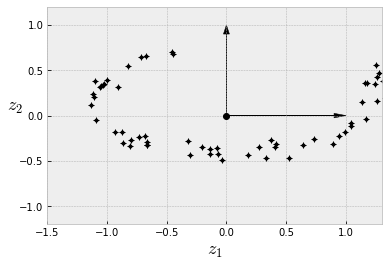

In [63]:
fig = plt.figure()
plt.plot(X2D[:, 0], X2D[:, 1], "k+")
plt.plot(X2D[:, 0], X2D[:, 1], "k.")
plt.plot([0], [0], "ko")
plt.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.axis([-1.5, 1.3, -1.2, 1.2])
plt.show()

##### New 2D dataset is obtained after reducing dimensionality from 3D using projections

* However,	projection	is	not	always	the	best	approach	to	dimensionality	reduction.	In	many cases	the	subspace	may	twist	and	turn,	such	as	in	the	famous	Swiss	roll	toy	dataset.
* Simply	projecting	onto	a	plane	would	squash	different	layers	of	the Swiss	roll	together.	But	what	we	really	want	is to	unroll	the	Swiss	roll	to	obtain	the	lower dimensional(2D)	dataset.

In [64]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

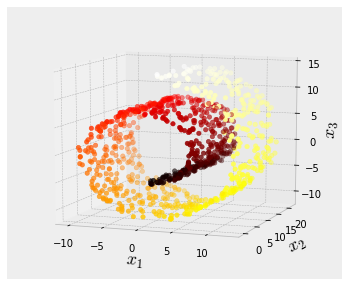

In [65]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

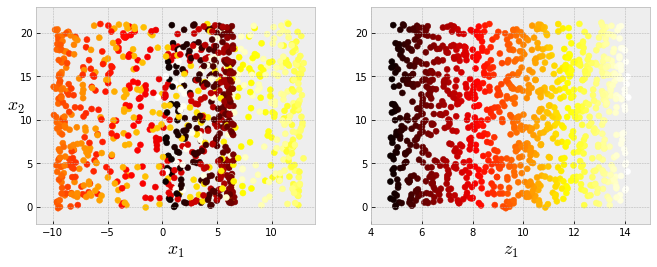

In [66]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.show()

# Manifold Learning

* The	Swiss	roll	is	an	example	of	a	2D	manifold.	A	2D	manifold	is	a	2D	shape that	can	be	bent	and	twisted	in	a	higher-dimensional	space.	
* More	generally,	a	d-dimensional	manifold	is	a	part	of	an	n-dimensional	space	(where	d	<	n)	that	locally resembles	a	d-dimensional	hyperplane.	
* In	the	case	of	the	Swiss	roll,	d	=	2	and	n	=	3:	it locally	resembles	a	2D	plane,	but	it	is	rolled	in	the	third	dimension.
* Many	dimensionality	reduction	algorithms	work	by	modeling	the	manifold	on	which	the training	instances	lie;	this	is	called	**Manifold	Learning**.
* It	relies	on	the	**manifold assumption**,	also	called	the	**manifold	hypothesis**,	which	holds	that	most	real-world	high-dimensional	datasets	lie	close	to	a	much	lower-dimensional	manifold.
* The	manifold	assumption	is	often	accompanied	by	another	implicit	assumption:	that	the
task	at	hand	(e.g.,	classification	or	regression)	will	be	simpler	if	expressed	in	the	lower-
dimensional	space	of	the	manifold.
* If	you	reduce	the	dimensionality	of	your	training	set	before	training	a	model,	it
will	definitely	speed	up	training,	but	it	may	not	always	lead	to	a	better	or	simpler	solution. 

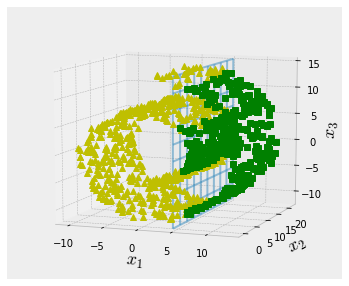

In [67]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

##### A plane at x=5 is the decision boundary that seperates the two classes

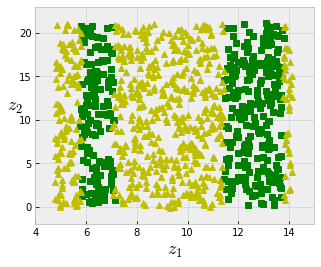

In [68]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

##### This	decision	boundary	looks	very simple	in	the	original	3D	space	(a	vertical	plane),	but	it	looks	more	complex	in	the unrolled	manifold	which is a	collection	of	four	independent	line segments.

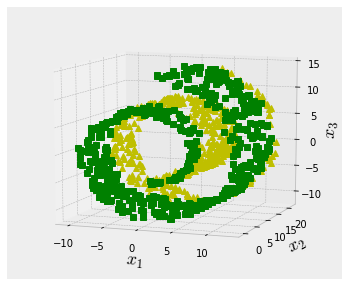

In [69]:
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

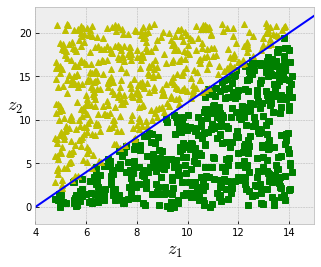

In [70]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

#####  The	Swiss roll	is	split	into	two	classes:	in	the	3D	space,	the	decision	boundary	would	be fairly	complex,	but	in	the	2D	unrolled	manifold	space,	the	decision boundary	is	a	simple	straight	line.

# PCA
* Principal	Component	Analysis	(PCA)	is		the	most	popular	dimensionality	reduction that first 	identifies	the	hyperplane	that	lies	closest	to	the	data,	and	then	it	projects the	data	onto	it.

# Preserving the Variance

* Before projecting	the	training	set	onto	a	lower-dimensional	hyperplane,	first we need	to	choose	the	right	hyperplane.
* We need	to	select	the	axis	that	preserves	the	maximum	amount	of	variance,	as it	will	most likely	lose	less	information	than	the	other	projections.	
* Another	way	to	justify this	choice	is	that	it	is	the	axis	that	minimizes	the	mean	squared	distance	between	the original	dataset	and	its	projection	onto	that	axis.	
* This	is	the	rather	simple	idea	behind PCA.

In [6]:
angle = np.pi / 5
stretch = 5
m = 200

In [7]:
np.random.seed(3)
X = np.random.randn(m, 2) / 10

In [8]:
X = X.dot(np.array([[stretch, 0],[0, 1]]))

In [9]:
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

In [10]:
u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

In [11]:
X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

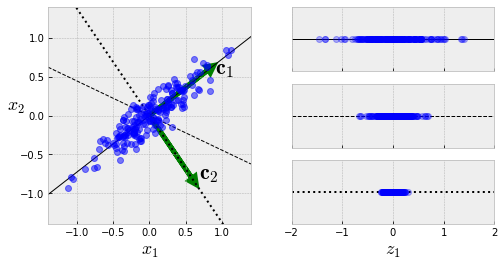

In [12]:
plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, head_length=0.1, fc='k', ec = 'g')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, head_length=0.1, fc='k', ec='g')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

** Conclusion:** The	projection	onto	the	solid	line	preserves	the	maximum	variance,	while	the
projection	onto	the	dotted	line	preserves	very	little	variance,	and	the	projection	onto	the
dashed	line	preserves	an	intermediate	amount	of	variance.

# Principal Components

* PCA	identifies	the	axis	that	accounts	for	the	largest	amount	of	variance	in	the	training	set.
* It	also	finds	a	second	axis,	orthogonal	to	the	first	one,	that accounts	for	the	largest	amount	of	remaining	variance.
* PCA	would	also	find	a third	axis,	orthogonal	to	both	previous	axes,	and	a	fourth,	a	fifth,	and	so	on	—	as	many axes	as	the	number	of	dimensions	in	the	dataset.
* The	unit	vector	that	defines	the	i th 	axis	is	called	the	i th 	principal	component	(PC).
* The	principal	components	of	a	training	set can be obtained by standard	matrix	factorization	technique	called	Singular	Value	Decomposition	(SVD)	that can	decompose	the	training	set	matrix	X	into	the	dot	product	of	three	matrices	U	·	Σ	·	$V^T$ ,where	$V^T$  	contains	all	the	principal	components	that	we	are	looking	for.
$$ V^T = (c_{1}, c_{2}, c_{3},.........c_{n})$$ 

# Projecting	Down	to	d	Dimensions

In [13]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

In [14]:
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3)) # np.empty returns a new array of given shape and type.
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2  # coulmn 1
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2               # coulmn 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)            # coulmn 3

In [15]:
X_centered = X - X.mean(axis=0)

In [16]:
U, s, V = np.linalg.svd(X_centered)

In [17]:
V

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

In [18]:
V.T

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [19]:
s

array([ 6.77645005,  2.82403671,  0.78116597])

In [20]:
c1 = V.T[:, 0]
c2 = V.T[:, 1]

In [21]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [22]:
np.allclose(X_centered, U.dot(S).dot(V))

True

In [23]:
W2 = V.T[:, :2] # W2 is the matrix with first two principal components

In [24]:
X2D = X_centered.dot(W2)

In [25]:
X2D[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [26]:
X2D_using_svd = X2D

In [27]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [29]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [30]:
np.allclose(X2D, -X2D_using_svd)

True

##### PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped

### Recovering the original 3D ponts:

In [31]:
X3D_inv = pca.inverse_transform(X2D)
X3D_inv_using_svd = X2D_using_svd.dot(V[:2, :])

In [32]:
np.allclose(X3D_inv, X)

False

* There will be some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points. It results in reconstruction error defined as the mean squared distance between the original data and the reconstruction data.

In [33]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))      #reconstruction error

0.010170337792848549

In [34]:
np.allclose(X3D_inv_using_svd, X3D_inv)

False

* The reconstructions from both methods are not identical because Scikit-Learn's PCA class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction

In [35]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [36]:
pca.components_       ## components used in PCA fot projecting down to 2D

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

# Explained	Variance	Ratio

* Explained Variance Ratio indicates	the proportion	of	the	dataset’s	variance	that	lies	along	the	axis	of	each	principal	component.

In [37]:
pca.explained_variance_ratio_

array([ 0.84248607,  0.14631839])

##### The first dimension explains 84.2% of the variance, while the second explains 14.6%.



In [38]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688864

##### By projecting down to 2D, we lost about 1.1% of the variance:


In [39]:
#computation of the explained variance ratio using the SVD approach 
np.square(s) / np.square(s).sum()

array([ 0.84248607,  0.14631839,  0.01119554])

# Choosing	the	Right	Number	of	Dimensions

* Instead	of	arbitrarily	choosing	the	number	of	dimensions	to	reduce	down	to,	it	is	generally preferable	to	choose	the	number	of	dimensions	that	add	up	to	a	sufficiently	large	portion of	the	variance(eg: 95%)

In [40]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [41]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

* The minimum	number	of	dimensions	required	to	preserve	95%	of	the	training	set’s	variance is 154. 
* Now we can set n_components to 154 and run the PCA again

In [43]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)

* Instead	of	specifying	the	number	of	principal	components	we	want	to	preserve,
we	can	set	 n_components 	to	be	a	float	between	 0.0 	and	 1.0 ,	indicating	the	ratio	of
variance	we	wish	to	preserve.

In [44]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_, np.sum(pca.explained_variance_ratio_)

(154, 0.95044630302001842)

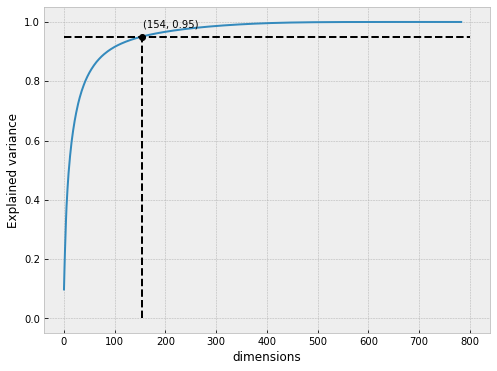

In [45]:
plt.figure(figsize=(8,6))
plt.plot(cumsum)
plt.plot([0,800], [0.95, 0.95], "k--", linewidth=2)
plt.plot([d, d], [0, 0.95], "k--", linewidth=2)
plt.plot([153], [0.95], 'ok')
plt.text(156,0.98, '(154, 0.95)')
plt.xlabel('dimensions')
plt.ylabel('Explained variance')
plt.show()

##### ** Conclusion: ** Reducing dimensionality to 154 preserves 95% variance 

# PCA	for	Compression

In [46]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [47]:
def printnum(X_train):
    plt.figure(figsize=(5,5))
    for i in range(25):
        x = plt.subplot(5, 5, i+1)
        x = plt.imshow(X_train[i].reshape(28, 28), cmap = matplotlib.cm.binary)
        x = plt.title(y_train[i])
        x = plt.axis('off')

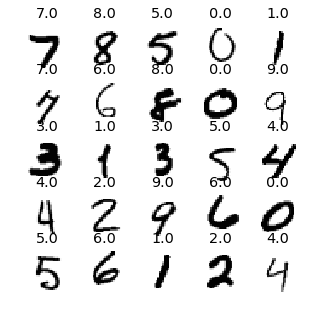

In [48]:
printnum(X_train)

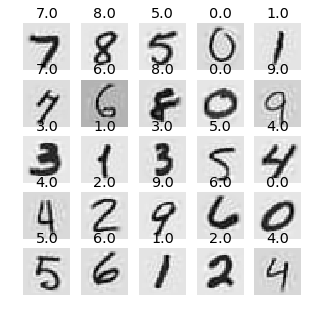

In [49]:
printnum(X_recovered)

##### ** Conclusion: ** There	is	a	slight	image	quality	loss,	but the	digits	are	still	mostly	intact after decompression.

# Incremental PCA

* Instead of having the	whole training	set	to	fit	in	memory	for	the	SVD	algorithm	to	run, using Incremental	PCA	(IPCA)	algorithms	we	can	split	the	training	set into	mini-batches	and	feed	an	IPCA	algorithm	one	mini-batch	at	a	time.	
* This	is	useful	for large	training	sets,	and	alsoto	apply	PCA	online

In [50]:
from sklearn.decomposition import IncrementalPCA

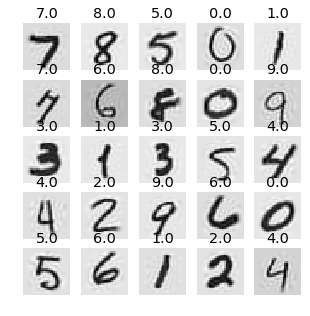

In [51]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_mnist_reduced = inc_pca.transform(X_train)
X_mnist_inv = inc_pca.inverse_transform(X_mnist_reduced)
printnum(X_mnist_inv)

* Incremental PCA uses numpys array_split() function to split the training dataset into batches and here partial_fit is used instead if fit 

# Kernel PCA

* The same	trick	used in SVMs can	be	applied	to	PCA,	making	it	possible	to	perform complex	nonlinear	projections	for	dimensionality	reduction.	This	is	called	Kernel	PCA(kPCA).
* It	is	often	good	at	preserving	clusters	of	instances	after	projection,	or	sometimes even	unrolling	datasets	that	lie	close	to	a	twisted	manifold.

In [79]:
from sklearn.decomposition import KernelPCA

In [80]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [81]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True) 
reduce_x_linear = lin_pca.fit_transform(X)

In [82]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
reduce_x_rbf = rbf_pca.fit_transform(X)

In [83]:
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)
reduce_x_sig = sig_pca.fit_transform(X)

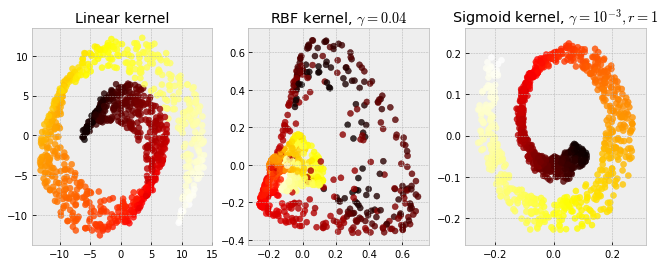

In [84]:
plt.figure(figsize=(11,4))
#plt.view_init(10, -70)
plt.subplot(131)
plt.scatter(reduce_x_linear[:,0], reduce_x_linear[:,1], c = t, cmap=plt.cm.hot, alpha=0.8)
plt.title("Linear kernel")
plt.subplot(132)
plt.scatter(reduce_x_rbf[:,0], reduce_x_rbf[:,1],c = t, cmap=plt.cm.hot, alpha=0.8)
plt.title("RBF kernel, $\gamma=0.04$")
plt.subplot(133)
plt.scatter(reduce_x_sig[:,0], reduce_x_sig[:,1],c = t, cmap=plt.cm.hot, alpha=0.8)
x = plt.title("Sigmoid kernel, $\gamma=10^{-3}, r=1$")

* Use	grid	search	to	select	the	kernel	and	hyperparameters	that	lead	to	the
best	performance.

# Selecting	a	Kernel	and	Tuning	Hyperparameters

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

y = t > 6.9

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
print(grid_search.best_params_)

{'kpca__gamma': 0.045555555555555557, 'kpca__kernel': 'rbf'}


In [103]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0455,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [104]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

33.503529770962643

* After tuning the parameters we get the best parameters as 'kpca__gamma': 0.045555555555555557, 'kpca__kernel': 'rbf'.
* Training again with the best parameters obtained we get a mean squared error of 33.50352

# LLE

* Locally	Linear	Embedding	(LLE) 8 	is	another	very	powerful	nonlinear	dimensionality reduction	(NLDR)	technique.	
* It	is	a	Manifold	Learning	technique	that	does	not	rely	on projections	like	the	previous	algorithms.	
* LLE	works	by	first	measuring	how each	training	instance	linearly	relates	to	its	closest	neighbors	(c.n.),	and	then	looking	for	a low-dimensional	representation	of	the	training	set	where	these	local	relationships	are	best preserved	(more	details	shortly).	
* This	makes	it	particularly	good	at	unrolling	twisted manifolds,	especially	when	there	is	not	too	much	noise.

In [85]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [86]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

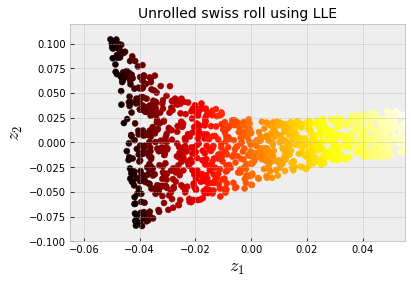

In [87]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.show()

##### The	Swiss	roll	is	completely	unrolled	and	the	distances	between	instances	are	locally	wellpreserved.	However,	distances	are	not	preserved	on	a	larger	scale:	the	left	part	of	the unrolled	Swiss	roll	is	squeezed,	while	the	right	part	is	stretched.

# Other	Dimensionality	Reduction	Techniques

#### Multidimensional	Scaling	(MDS)	reduces	dimensionality	while	trying	to	preserve	the distances	between	the	instances

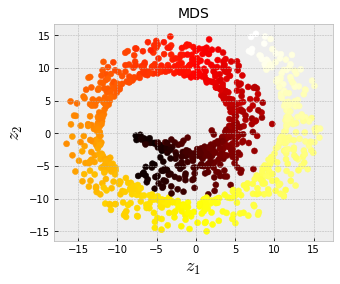

In [90]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)
plt.figure(figsize=(5,4))
plt.title("MDS", fontsize=14)
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.show()

##### Isomap	creates	a	graph	by	connecting	each	instance	to	its	nearest	neighbors,	then reduces	dimensionality	while	trying	to	preserve	the	geodesic	distances 9 	between	the instances.

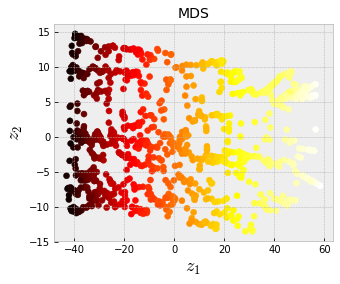

In [91]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)
plt.figure(figsize=(5,4))
plt.title("MDS", fontsize=14)
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.show()

##### t-Distributed	Stochastic	Neighbor	Embedding	(t-SNE)	reduces	dimensionality	while trying	to	keep	similar	instances	close	and	dissimilar	instances	apart.	
##### It	is	mostly	used for	visualization,	in	particular	to	visualize	clusters	of	instances	in	high-dimensional space.

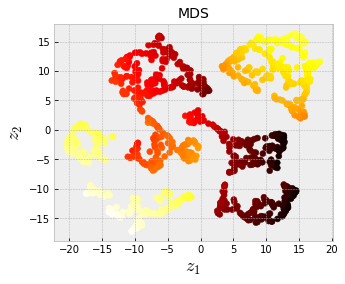

In [92]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
plt.figure(figsize=(5,4))
plt.title("MDS", fontsize=14)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.show()